In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install --upgrade pip

!pip install statsmodels
import statsmodels
print(statsmodels.__version__)

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.filters.hp_filter import hpfilter
!pip install pmdarima
from pmdarima import auto_arima

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
!pip install scikit-learn
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import plotly.graph_objects as go

import missingno as msno
from sklearn.model_selection import train_test_split
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.statespace.sarimax import SARIMAX


from prophet import Prophet
#from neuralprophet import NeuralProphet



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
0.13.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Load the data into a pandas DataFrame
dataset = pd.read_excel('new_sales.xlsx')

# Explore the data
print(dataset.head())


        Date     Order ID  Amount    Sales
0 2022-04-01  51960721729   460.0   438.10
1 2022-04-01  51961645447   460.0   438.10
2 2022-04-01  51961011403   334.0   318.10
3 2022-04-01  51961082119  1051.0  1000.95
4 2022-04-01  51961718111  1284.0  1146.43


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248520 entries, 0 to 248519
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Date      248520 non-null  datetime64[ns]
 1   Order ID  248520 non-null  object        
 2   Amount    248520 non-null  float64       
 3   Sales     248520 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 7.6+ MB


In [ ]:
import pandas as pd
dataset['Order ID'] = pd.to_numeric(dataset['Order ID'], errors='coerce')

# The "errors" parameter is set to 'coerce' to convert non-numeric values to NaN.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248520 entries, 0 to 248519
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Date      248520 non-null  datetime64[ns]
 1   Order ID  62701 non-null   float64       
 2   Amount    248520 non-null  float64       
 3   Sales     248520 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 7.6 MB


In [ ]:
print(dataset.describe())

           Order ID         Amount          Sales
count  6.270100e+04  248520.000000  248520.000000
mean   3.032774e+11     753.030738     655.432276
std    7.234096e+12     613.809892     513.825545
min    1.004000e+03       0.000000       0.000000
25%    4.061049e+09     429.000000     373.180000
50%    4.063008e+09     699.000000     637.140000
75%    4.064831e+09     989.000000     919.050000
max    2.000000e+14   12593.390000   11993.710000


In [ ]:
dataset.shape

(248520, 4)

In [ ]:
#Missing Values Imputation
dataset.isnull().sum()

Date             0
Order ID    185819
Amount           0
Sales            0
dtype: int64

In [ ]:
#Demand imputation
# Clean the data
#dataset.dropna(inplace=True)

OrderID = dataset['Order ID'].median()
dataset['Order ID'] = dataset['Order ID'].fillna(OrderID)

Amount = dataset['Amount'].median()
dataset['Amount'] = dataset['Amount'].fillna(Amount)

Sales = dataset['Sales'].median()
dataset['Sales'] = dataset['Sales'].fillna(Sales)


In [ ]:
#Missing Values Imputation
dataset.isnull().sum()

Date        0
Order ID    0
Amount      0
Sales       0
dtype: int64

In [ ]:
dataset.isnull().sum()
# Explore the data
print(dataset.head())
dataset.shape

        Date      Order ID  Amount    Sales
0 2022-04-01  5.196072e+10   460.0   438.10
1 2022-04-01  5.196165e+10   460.0   438.10
2 2022-04-01  5.196101e+10   334.0   318.10
3 2022-04-01  5.196108e+10  1051.0  1000.95
4 2022-04-01  5.196172e+10  1284.0  1146.43


(248520, 4)

In [ ]:
print(dataset.columns)

Index(['Date', 'Order ID', 'Amount', 'Sales'], dtype='object')


In [ ]:
from scipy import stats

# Calculate Z-scores for the 'Sales' column
z_scores = stats.zscore(dataset['Sales'])

# Define a threshold for outlier detection
threshold = 3

# Identify and remove outliers
dataset = dataset[(z_scores < threshold)]

# Print the cleaned dataset
print(dataset.head())

        Date      Order ID  Amount    Sales
0 2022-04-01  5.196072e+10   460.0   438.10
1 2022-04-01  5.196165e+10   460.0   438.10
2 2022-04-01  5.196101e+10   334.0   318.10
3 2022-04-01  5.196108e+10  1051.0  1000.95
4 2022-04-01  5.196172e+10  1284.0  1146.43


In [ ]:
# convert date column to datatime object
dataset['Date'] = pd.to_datetime(dataset['Date'], format='%Y-%m-%d')

dataset = dataset.groupby('Date')['Sales'].sum().reset_index()
# set date column as index
dataset = dataset.set_index('Date')

# check for duplicates in the index
print(dataset.index.duplicated())


[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False]


<ipython-input-19-31aa26678b76>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Date'] = pd.to_datetime(dataset['Date'], format='%Y-%m-%d')


<Axes: xlabel='Date'>

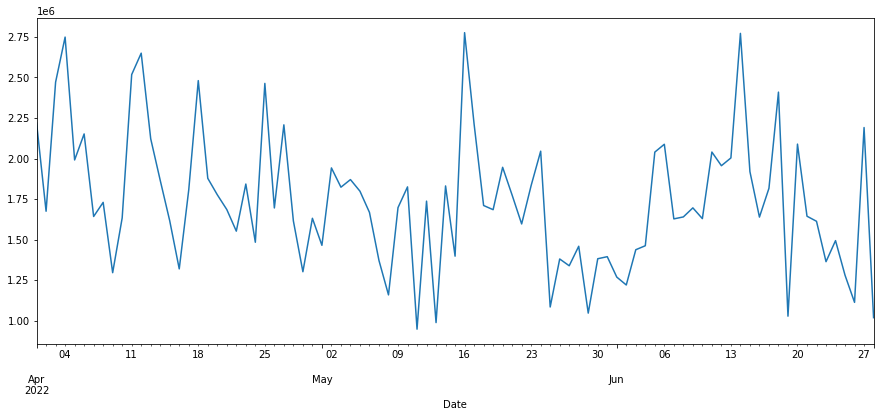

In [ ]:
dataset.Sales.plot(figsize=(15,6))

In [ ]:
# Analytical Base Table creation
# Extract the year, month, and week from the Date column
dataset['Year'] = dataset.index.year
dataset['Month'] = dataset.index.month
dataset['Day'] = dataset.index.day
dataset['Week'] = dataset.index.weekday
dataset['Week'] = np.where(dataset.Week == 0, 7, dataset.Week)

# Create the ABT
abt_df = dataset[['Year', 'Month', 'Day', 'Week', 'Sales']]
abt_df.to_csv('Dataset_abt.csv', index=False)

# Rename the DataFrame
dataset = abt_df.copy()

# Print the renamed DataFrame
print(dataset)


            Year  Month  Day  Week       Sales
Date                                          
2022-04-01  2022      4    1     4  2219154.36
2022-04-02  2022      4    2     5  1674861.26
2022-04-03  2022      4    3     6  2471196.94
2022-04-04  2022      4    4     7  2749281.67
2022-04-05  2022      4    5     1  1991294.75
...          ...    ...  ...   ...         ...
2022-06-24  2022      6   24     4  1493642.25
2022-06-25  2022      6   25     5  1279909.61
2022-06-26  2022      6   26     6  1112688.16
2022-06-27  2022      6   27     7  2191277.27
2022-06-28  2022      6   28     1  1018226.63

[89 rows x 5 columns]


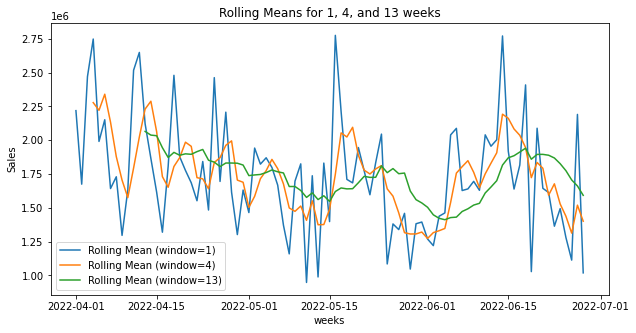

In [ ]:
# calculate rolling means with windows of 1, 4, and 13
rolling_1 = dataset['Sales'].rolling(window=1).mean()
rolling_4 = dataset['Sales'].rolling(window=4).mean()
rolling_13 = dataset['Sales'].rolling(window=13).mean()

# plot the rolling means
plt.figure(figsize=(10,5))
plt.plot(rolling_1, label='Rolling Mean (window=1)')
plt.plot(rolling_4, label='Rolling Mean (window=4)')
plt.plot(rolling_13, label='Rolling Mean (window=13)')

# add title, legend, and axis labels
plt.title('Rolling Means for 1, 4, and 13 weeks')
plt.legend()
plt.xlabel('weeks')
plt.ylabel('Sales')

# display the plot
plt.show()


In [ ]:
#Autocorrelation

# calculate autocorrelations
print(f'1 week lag: {round(dataset["Sales"].autocorr(lag=1),4)}')
print(f'2 week lag: {round(dataset["Sales"].autocorr(lag=2),4)}')
print(f'1 year lag: {round(dataset["Sales"].autocorr(lag=43),4)}')



1 week lag: 0.231
2 week lag: 0.2482
1 year lag: 0.0633


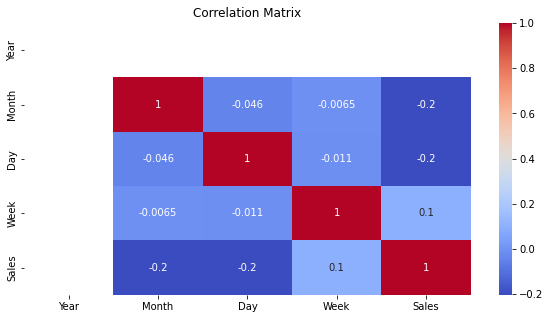

In [ ]:
corr_matrix = dataset.corr()

# plot the correlation matrix as a heatmap
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# add title and display the plot
plt.title('Correlation Matrix')
plt.show()

In [ ]:
dataset.head

<bound method NDFrame.head of             Year  Month  Day  Week       Sales
Date                                          
2022-04-01  2022      4    1     4  2219154.36
2022-04-02  2022      4    2     5  1674861.26
2022-04-03  2022      4    3     6  2471196.94
2022-04-04  2022      4    4     7  2749281.67
2022-04-05  2022      4    5     1  1991294.75
...          ...    ...  ...   ...         ...
2022-06-24  2022      6   24     4  1493642.25
2022-06-25  2022      6   25     5  1279909.61
2022-06-26  2022      6   26     6  1112688.16
2022-06-27  2022      6   27     7  2191277.27
2022-06-28  2022      6   28     1  1018226.63

[89 rows x 5 columns]>

In [ ]:
# Convert non-numeric values to NaN
dataset['Sales'] = pd.to_numeric(dataset['Sales'], errors='coerce')

# Split the DataFrame into training and test sets with a 70:30 ratio
train_data, test_data = train_test_split(dataset, test_size=0.3, random_state=42)

# Drop rows with missing or null values in the "Sales" column
train_data = train_data.dropna(subset=['Sales'])
test_data = test_data.dropna(subset=['Sales'])

# Extract the "Sales" column from the training and test sets
train_sales = train_data['Sales'].values
test_sales = test_data['Sales'].values


In [ ]:
train_sales.shape

(62,)

In [ ]:
test_sales.shape

(27,)

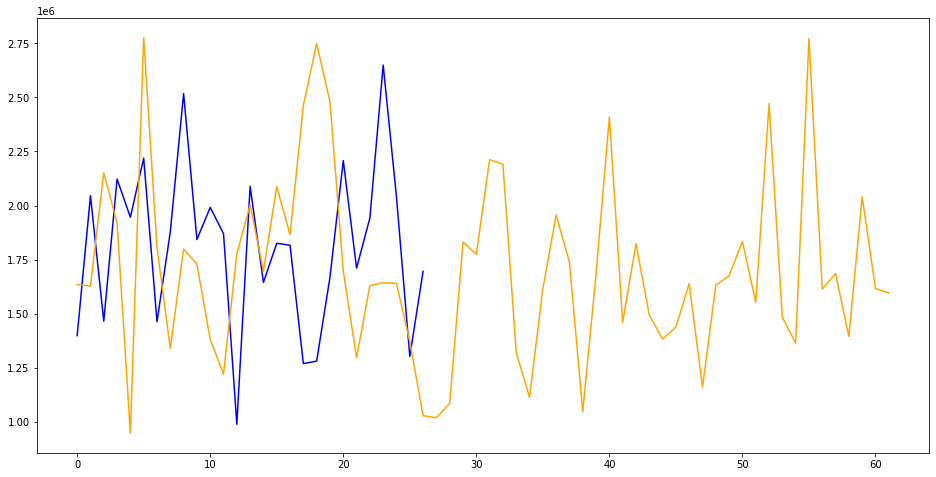

In [ ]:
def train_test_plot(train_sales, test_sales):
    plt.figure(figsize=(16, 8))
    plt.plot(train_sales, c='blue')
    plt.plot(test_sales, c='orange');

train_test_plot(test_sales, train_sales)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Instantiate the ARIMA model
model = ARIMA(train_sales, order=(1, 0, 0))

# Fit the model to the training data
model_fit = model.fit()


In [ ]:
# Make predictions on the training and test sets
train_pred = model_fit.predict()
test_pred = model_fit.predict(start=len(train_sales), end=len(train_sales)+len(test_sales)-1)

# Calculate the MSE on the training and test sets
train_mse = mean_squared_error(train_sales, train_pred)
test_mse = mean_squared_error(test_sales, test_pred)

print('Training MSE:', train_mse)
print('Test MSE:', test_mse)


Training MSE: 179897466481.70767
Test MSE: 154149947391.0148


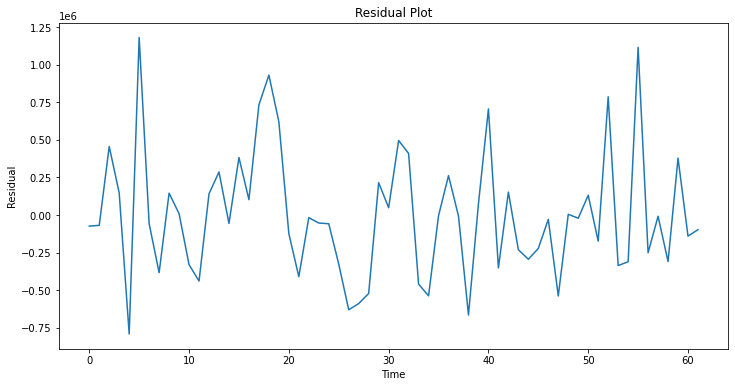

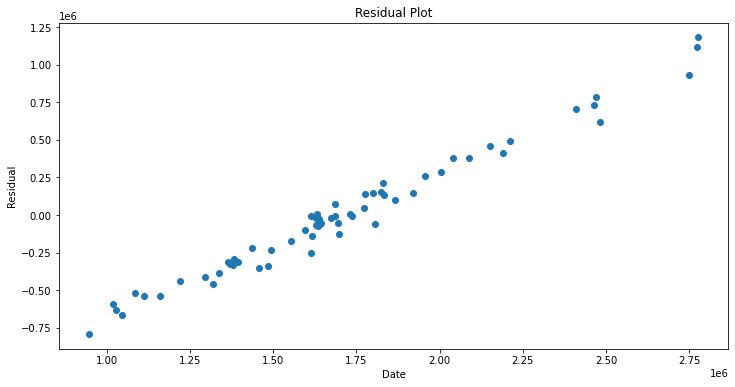

In [ ]:
import matplotlib.pyplot as plt

# Calculate the residuals
residuals = train_sales - train_pred

# Plot the residuals
plt.figure(figsize=(12,6))
plt.plot(residuals)
plt.xlabel('Time')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()

# Calculate the residuals
residuals = train_sales - train_pred

# Plot the residuals as a scatter plot against dates
plt.figure(figsize=(12, 6))
plt.scatter(train_sales, residuals)
plt.xlabel('Date')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()


In [ ]:
# Get the start and end dates of the dataset
start_date = dataset.index.min().date()
end_date = dataset.index.max().date()

print('Start date:', start_date)
print('End date:', end_date)

Start date: 2022-04-01
End date: 2022-06-28


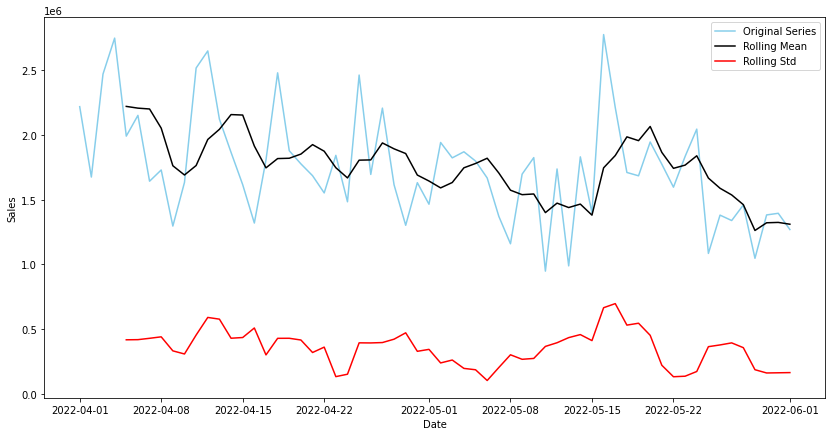

Test statistic = -1.480
P-value = 0.544
Critical values :
	1%: -3.560242358792829 - The data is not stationary with 99% confidence
	5%: -2.9178502070837 - The data is not stationary with 95% confidence
	10%: -2.5967964150943397 - The data is not stationary with 90% confidence


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


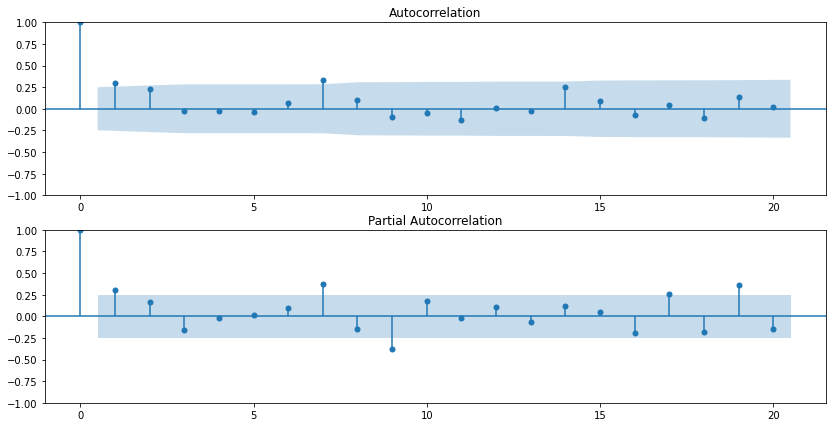

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# convert the 'Date' column to a datetime object and set it as the index
#dataset['Date'] = pd.to_datetime(dataset['Date'])
#dataset.set_index('Date', inplace=True)

# split the data into training and test sets
train_data = dataset.loc['2022-04-01':'2022-06-01']
test_data = dataset.loc['2022-06-02':'2022-06-28']


# select the 'Sales' column from the training and test sets
arima_df = train_data['Sales']
arima_test_df = test_data['Sales']


def test_stationarity(timeseries):
    # Plotting rolling statistics
    rollmean = timeseries.rolling(window=5).mean()
    rollstd = timeseries.rolling(window=5).std()

    plt.figure(figsize=(14,7))
    plt.plot(timeseries, color='skyblue', label='Original Series')
    plt.plot(rollmean, color='black', label='Rolling Mean')
    plt.plot(rollstd, color='red', label='Rolling Std')
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.show()
    
    # Augmented Dickey-Fuller Test
    adfuller_test = adfuller(timeseries, autolag='AIC')
    print("Test statistic = {:.3f}".format(adfuller_test[0]))
    print("P-value = {:.3f}".format(adfuller_test[1]))
    print("Critical values :")
    
    for key, value in adfuller_test[4].items():
        print("\t{}: {} - The data is {} stationary with {}% confidence"
              .format(key, value, '' if adfuller_test[0] < value else 'not', 100-int(key[:-1])))
        
# Autocorrelation Plots
    fig, ax = plt.subplots(2, figsize=(14,7))
    ax[0] = plot_acf(timeseries, ax=ax[0], lags=20)
    ax[1] = plot_pacf(timeseries, ax=ax[1], lags=20)
    
test_stationarity(arima_df)


In [ ]:
print(arima_df)

Date
2022-04-01    2219154.36
2022-04-02    1674861.26
2022-04-03    2471196.94
2022-04-04    2749281.67
2022-04-05    1991294.75
                 ...    
2022-05-28    1458847.48
2022-05-29    1046364.13
2022-05-30    1381803.36
2022-05-31    1394499.86
2022-06-01    1268667.26
Name: Sales, Length: 62, dtype: float64


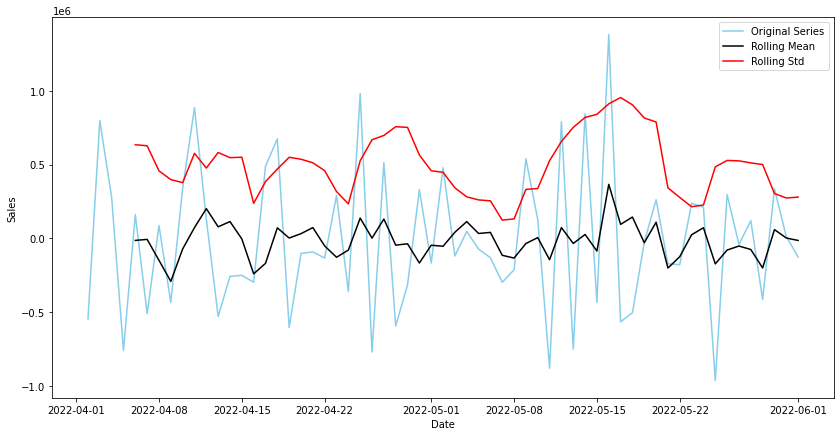

Test statistic = -3.521
P-value = 0.007
Critical values :
	1%: -3.562878534649522 - The data is not stationary with 99% confidence
	5%: -2.918973284023669 - The data is  stationary with 95% confidence
	10%: -2.597393446745562 - The data is  stationary with 90% confidence


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


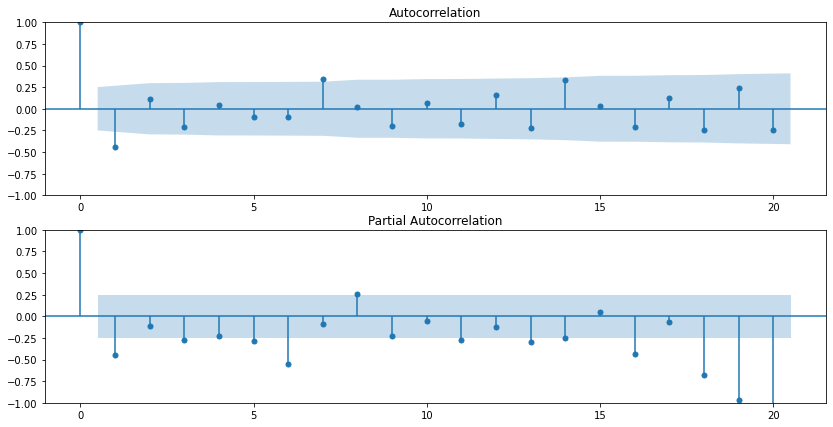

In [ ]:
#test results indicate that the series is not stationary, 
#the next step is to make the series stationary through differencing.
# apply differencing
first_difference = arima_df - arima_df.shift(1)
first_difference.dropna(inplace=True)

# check for stationarity after differencing
test_stationarity(first_difference)



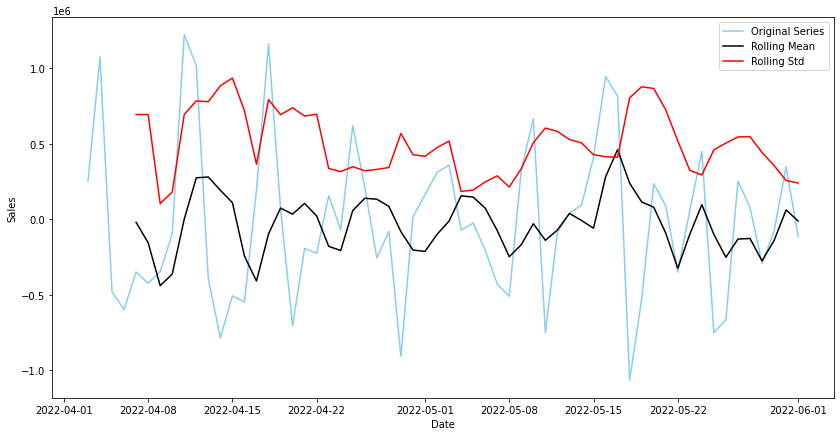

Test statistic = -3.655
P-value = 0.005
Critical values :
	1%: -3.562878534649522 - The data is  stationary with 99% confidence
	5%: -2.918973284023669 - The data is  stationary with 95% confidence
	10%: -2.597393446745562 - The data is  stationary with 90% confidence


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


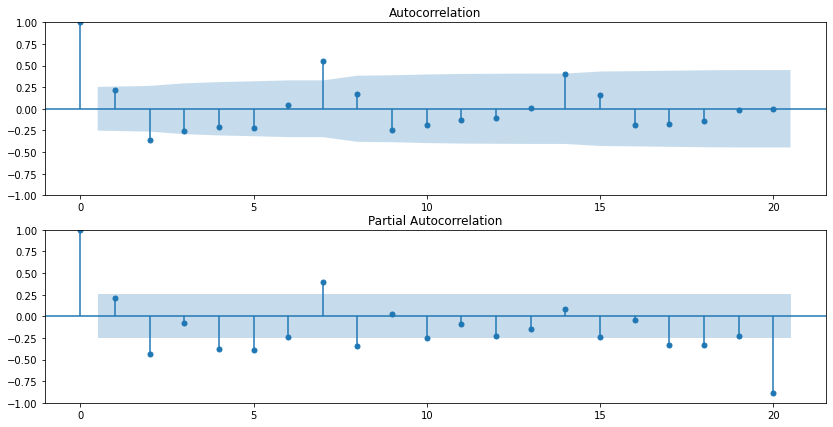

In [ ]:
# apply differencing
first_difference = arima_df - arima_df.shift(2)
first_difference.dropna(inplace=True)

# check for stationarity after differencing
test_stationarity(first_difference)

In [ ]:
print(test_stationarity)

<function test_stationarity at 0x7f75a1514160>


In [ ]:
arima_model = auto_arima(arima_df, trace=True, suppress_warnings=True, seasonal=False, stationary=True)
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1784.663, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1784.966, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1781.031, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1783.211, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1963.932, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1781.503, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1782.936, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1783.448, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1806.582, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.287 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   62
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -887.516
Date:                Mon, 27 Mar 2023   AIC                           1781.031
Time:                        10:12:27   BIC                           1787.413
Sample:                    04-01-2022   HQIC                          1783.537
                         - 06-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.206e+06   2.53e+05      4.758      0.000    7.09e+05     1.7e+06
ar.L1          0.3106      0.143      2.178      0.029       0.031       0.590
sigma2      1.579e+11      0.415   3.81e+11      0.000    1.58e+11    1.58e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                 3.41
Prob(Q):                              0.66   Prob(JB):                         0.18
Heteroskedasticity (H):               1.02   Skew:                             0.54
Prob(H) (two-sided):                  0.96   Kurtosis:                         3.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.31e+27. Standard errors may be unstable.
"""

In [ ]:
start = len(arima_df)
end = len(arima_df) + len(arima_test_df) + 31

In [ ]:
#arima_model=ARIMA(arima_df,order=(1,0,0))
#model_arima_best1 = arima_model.fit()
#predict = model_arima_best1.predict(start=start, end=end, typ="levels")


# Fit ARIMA model to your data
arima_model = ARIMA(arima_df, order=(0, 1, 1))
model_arima_best1 = arima_model.fit()
predict = model_arima_best1.predict(start=start, end=end, typ="levels")

# Set start and end dates for forecasting
start = len(arima_df)
end = start + 364 # 365 days = 52 weeks x 7 days/week - 1

# Generate forecasts for the next 365 days
forecast = model_arima_best1.forecast(steps=365)[0]

# Print or plot the forecast as required
print(forecast)

1481589.3080352852


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
model_arima_best = ARIMA(arima_df,order=(0,1,1))
model_arima_best1 = model_arima_best.fit()
predict = model_arima_best1.predict(start=start, end=end, typ="levels")

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
model_arima_best1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   62
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -878.305
Date:                Mon, 27 Mar 2023   AIC                           1760.611
Time:                        10:12:27   BIC                           1764.833
Sample:                    04-01-2022   HQIC                          1762.266
                         - 06-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8824      0.086    -10.223      0.000      -1.052      -0.713
sigma2      1.852e+11   9.75e-14    1.9e+24      0.000    1.85e+11    1.85e+11
===================================================================================
Ljung-Box (L1) (Q):                   4.91   Jarque-Bera (JB):                 8.46
Prob(Q):                              0.03   Prob(JB):                         0.01
Heteroskedasticity (H):               0.69   Skew:                             0.86
Prob(H) (two-sided):                  0.42   Kurtosis:                         3.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [ ]:
prediction = pd.DataFrame(predict)
prediction.columns = ["Predicted_Sales"]
prediction.head()

,Predicted_Sales
2022-06-02,1.481589e+06
2022-06-03,1.481589e+06
2022-06-04,1.481589e+06
2022-06-05,1.481589e+06
2022-06-06,1.481589e+06


<ipython-input-45-423cda1cb806>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo:" (-> color='b'). The keyword argument will take precedence.
  plt.plot(arima_df, "bo:", color="red")
<ipython-input-45-423cda1cb806>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo:" (-> color='b'). The keyword argument will take precedence.
  plt.plot(arima_test_df, "bo:", color="green")


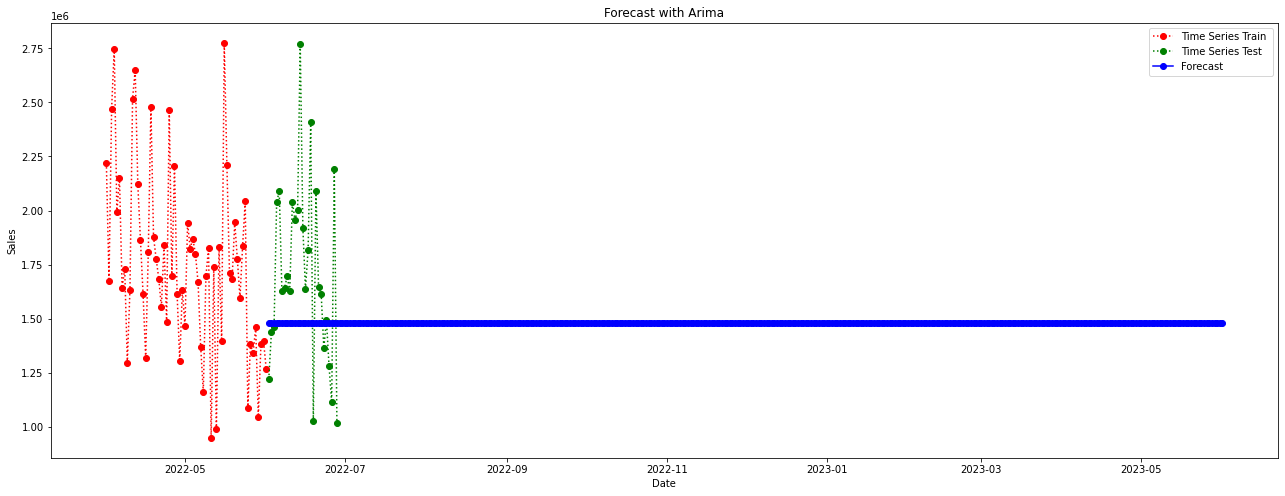

In [ ]:
fig, axs = plt.subplots(figsize=(22,8))

plt.plot(arima_df, "bo:", color="red")
plt.plot(arima_test_df, "bo:", color="green")
plt.plot(prediction,"bo-")


plt.legend(['Time Series Train ','Time Series Test','Forecast' ])

plt.title("Forecast with Arima")
plt.ylabel("Sales")
plt.xlabel("Date")
plt.show()

In [ ]:
print(len(arima_test_df))
print(len(prediction))

27
365


In [ ]:
print(arima_test_df.dtypes)
print(prediction[:len(arima_test_df)].dtypes)




float64
Predicted_Sales    float64
dtype: object


In [ ]:
print(arima_test_df.head())

Date
2022-06-02    1219901.50
2022-06-03    1437454.81
2022-06-04    1461990.49
2022-06-05    2039727.70
2022-06-06    2088122.84
Name: Sales, dtype: float64


In [ ]:
print(prediction[:len(arima_test_df)].head())

            Predicted_Sales
2022-06-02     1.481589e+06
2022-06-03     1.481589e+06
2022-06-04     1.481589e+06
2022-06-05     1.481589e+06
2022-06-06     1.481589e+06


In [ ]:
test1 = arima_test_df.copy()
test1.columns = ["Test"]
test1 = test1.reset_index(drop=True)
test1.shape



(27,)

In [ ]:
test1 = arima_test_df.copy()
test1.columns = ["Test"]
test1 = test1.reset_index(drop=True)

arima = prediction[["Predicted_Sales"]][:27]
arima.columns = ["Arima"]
arima = arima.reset_index(drop=True)

from sklearn.metrics import mean_absolute_error
mean_absolute_error(test1, arima)

mean_arima = mean_absolute_percentage_error(test1, arima)
print(f"Percentage of error with the ARIMA model: {mean_arima*100:.2f}%")


Percentage of error with the ARIMA model: 20.88%


In [ ]:
from math import sqrt
mean_arima = mean_absolute_percentage_error(test1, arima)
print(f"Percentage of error with the ARIMA model: {mean_arima*100:.2f}%")

mse = mean_squared_error(test1, arima)
mae = mean_absolute_error(test1, arima)
rmse = sqrt(mse)
mape = np.mean(np.abs((test1 - arima) / test1)) * 100
smape = np.mean(2.0 * np.abs(arima - test1) / (np.abs(arima) + np.abs(test1))) * 100

print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("Mean Absolute Error (MAE): {:.2f}".format(mae))
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))

Percentage of error with the ARIMA model: 20.88%
Mean Squared Error (MSE): 224332282080.02
Mean Absolute Error (MAE): 373640.43
Root Mean Squared Error (RMSE): 473637.29


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@PROPHET@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

In [ ]:
###prophet

# Load the data into a pandas DataFrame
dataset = pd.read_excel('new_sales.xlsx')

# Explore the data
print(dataset.head())

# Check the column names of the dataset
print(dataset.columns)
# Rename columns and create a new dataset
model_20 = dataset[["Date","Sales"]]
model_20 = model_20.rename(columns={"Date": "ds", "Sales": "y"})
model_20.head()










        Date     Order ID  Amount    Sales
0 2022-04-01  51960721729   460.0   438.10
1 2022-04-01  51961645447   460.0   438.10
2 2022-04-01  51961011403   334.0   318.10
3 2022-04-01  51961082119  1051.0  1000.95
4 2022-04-01  51961718111  1284.0  1146.43
Index(['Date', 'Order ID', 'Amount', 'Sales'], dtype='object')


,ds,y
0,2022-04-01,438.10
1,2022-04-01,438.10
2,2022-04-01,318.10
3,2022-04-01,1000.95
4,2022-04-01,1146.43


In [ ]:
model_20.describe()


,y
count,248520.000000
mean,655.432276
std,513.825545
min,0.000000
25%,373.180000
50%,637.140000
75%,919.050000
max,11993.710000


In [ ]:
from scipy import stats

# Calculate Z-scores for the 'Sales' column
z_scores = stats.zscore(model_20['y'])

# Define a threshold for outlier detection
threshold = 3

# Identify and remove outliers
model_20 = model_20[(z_scores < threshold)]

# Print the cleaned dataset
print(model_20.head())

          ds        y
0 2022-04-01   438.10
1 2022-04-01   438.10
2 2022-04-01   318.10
3 2022-04-01  1000.95
4 2022-04-01  1146.43


In [ ]:
#Missing Values Imputation
model_20.isnull().sum()

ds    0
y     0
dtype: int64

In [ ]:
# check for duplicates in the index
print(model_20.index.duplicated())

[False False False ... False False False]


In [ ]:
model_20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245971 entries, 0 to 248519
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   ds      245971 non-null  datetime64[ns]
 1   y       245971 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.7 MB


In [ ]:
# Split the DataFrame into training and test sets with a 70:30 ratio
train_data_sales, test_data_sales = train_test_split(model_20, test_size=0.3, random_state=42)

# Drop rows with missing or null values in the "Sales" column
train_data_sales = train_data_sales.dropna(subset=['y'])
test_data_sales = test_data_sales.dropna(subset=['y'])

# Extract the "ds" and "y" columns from the training and test sets
df_train = train_data_sales[['ds', 'y']]
df_test = test_data_sales[['ds', 'y']]

In [ ]:
df_train.shape

(172179, 2)

In [ ]:
print(df_test)

               ds        y
27431  2022-04-10     0.00
51447  2022-04-18   599.31
190074 2022-06-07   350.00
60051  2022-04-21   524.76
110368 2022-05-10   734.29
...           ...      ...
93807  2022-05-03   344.76
129713 2022-05-17  1200.72
14571  2022-04-05   581.90
137867 2022-05-20   665.71
91131  2022-05-02   568.57

[73792 rows x 2 columns]


In [ ]:
df_test.shape

(73792, 2)

In [ ]:
np.isnan(df_test).sum()

ds    0
y     0
dtype: int64

In [ ]:
#df_train = model_20.iloc[:122] #selects the first 122 rows of the DataFrame
#df_test = model_20.iloc[122:] #selects all rows from the 123rd row onwards

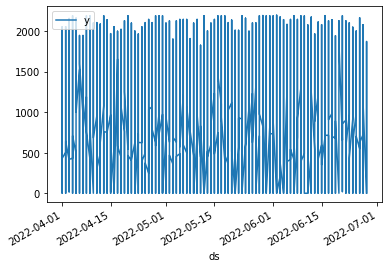

In [ ]:
df_test.set_index('ds').plot(kind='line')
plt.show()

In [ ]:
!pip install prophet --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet
model_P = Prophet(interval_width=0.95)
model_P = model_P.fit(df_test)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpes4es5hv/sqes9i95.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpes4es5hv/v8l3b1o0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82247', 'data', 'file=/tmp/tmpes4es5hv/sqes9i95.json', 'init=/tmp/tmpes4es5hv/v8l3b1o0.json', 'output', 'file=/tmp/tmpes4es5hv/prophet_model10v88qui/prophet_model-20230327101311.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:13:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:13:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_P = model_P.make_future_dataframe(periods=52, freq="W")
forecast_P = model_P.predict(future_P)

In [ ]:
forecast_P[['ds', 'yhat', 'yhat_lower', 'yhat_upper', "trend"]].head()

,ds,yhat,yhat_lower,yhat_upper,trend
0,2022-04-01,798.482750,-12.988221,1604.765865,794.299301
1,2022-04-02,708.805409,-54.526664,1479.625231,764.163592
2,2022-04-03,717.836033,-54.839429,1491.618535,734.027882
3,2022-04-04,703.573949,-102.814828,1552.865073,704.406993
4,2022-04-05,684.717678,-70.773648,1442.915313,674.786105


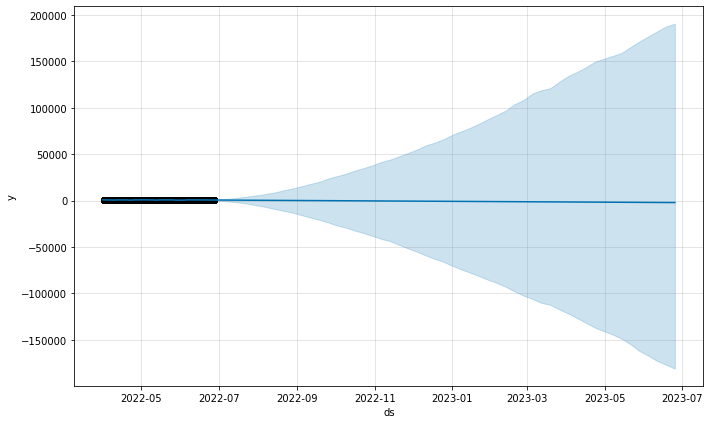

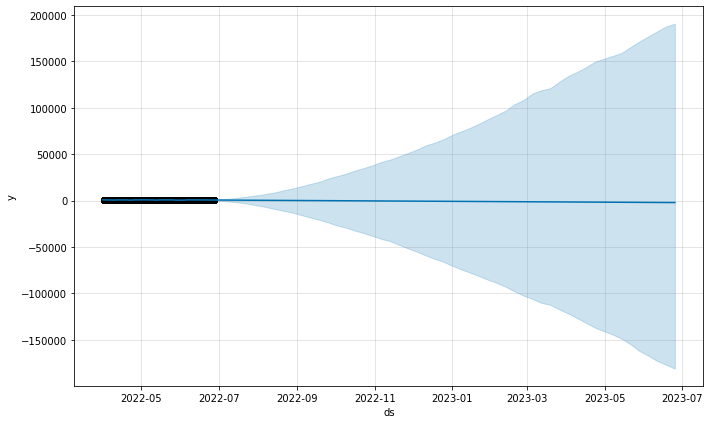

In [ ]:
model_P.plot(forecast_P)

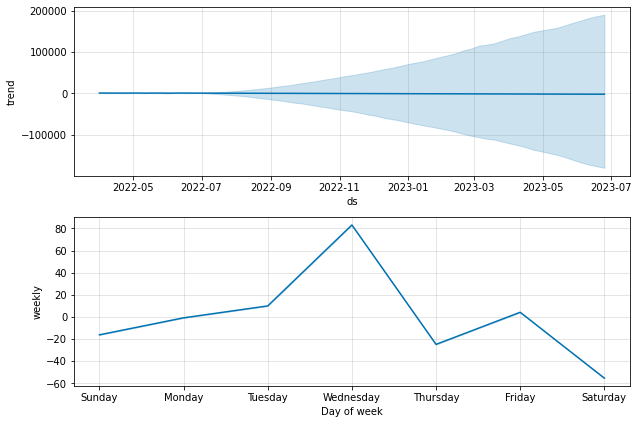

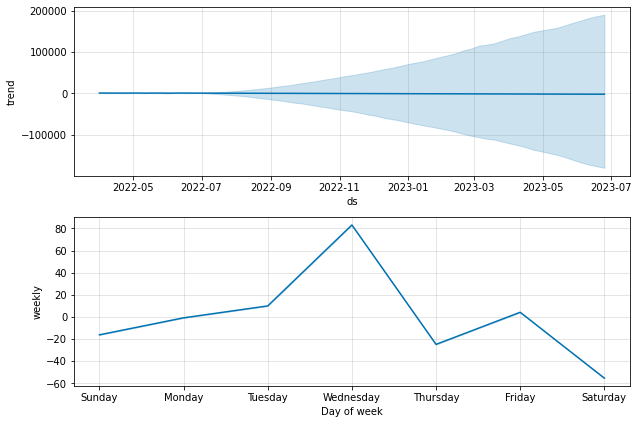

In [ ]:
model_P.plot_components(forecast_P)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet
import plotly.graph_objs as go

# Instantiate the Prophet model
model_P = Prophet(interval_width=0.95)

# Fit the model to the data
model_P.fit(df_test)

# Generate the forecast and plot the results
future = model_P.make_future_dataframe(periods=365)
forecast = model_P.predict(future)

# Plot the forecast

fig_forecast = plot_plotly(model_P, forecast)
fig_forecast.show()

# Plot the forecast components
fig_components = plot_components_plotly(model_P, forecast)
fig_components.show()


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpes4es5hv/8s4s5nln.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpes4es5hv/1_0a9out.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22514', 'data', 'file=/tmp/tmpes4es5hv/8s4s5nln.json', 'init=/tmp/tmpes4es5hv/1_0a9out.json', 'output', 'file=/tmp/tmpes4es5hv/prophet_model4cb1aobu/prophet_model-20230327101351.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:13:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:14:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


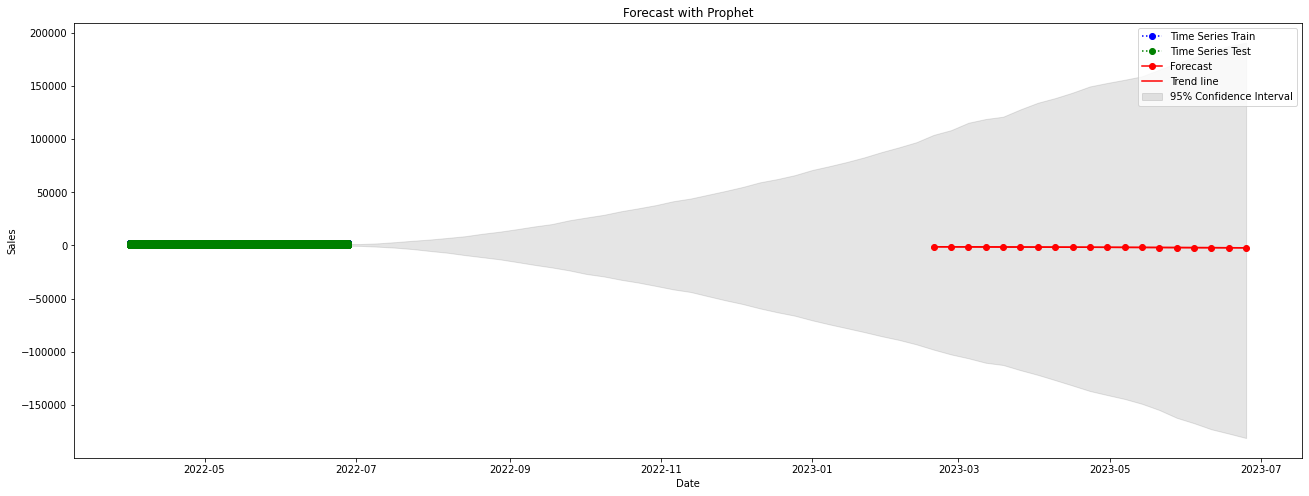

In [ ]:
plt.figure(figsize=(22,8))
plt.plot(df_train["ds"], df_train["y"], 'bo:')
plt.plot(df_test["ds"], df_test["y"], 'go:')
plt.plot(forecast_P["ds"][122:], forecast_P["yhat"][122:], "ro-")
plt.plot(forecast_P["ds"][122:], forecast_P["trend"][122:], "r")

plt.fill_between(forecast_P['ds'],forecast_P["yhat_upper"],forecast_P["yhat_lower"],alpha=0.1,color='black')

plt.legend(['Time Series Train ','Time Series Test','Forecast', "Trend line", "95% Confidence Interval"])
plt.title("Forecast with Prophet")
plt.ylabel("Sales")
plt.xlabel("Date")
plt.show()


<ipython-input-75-b07e5ea9665d>:2: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.



KeyError: ignored

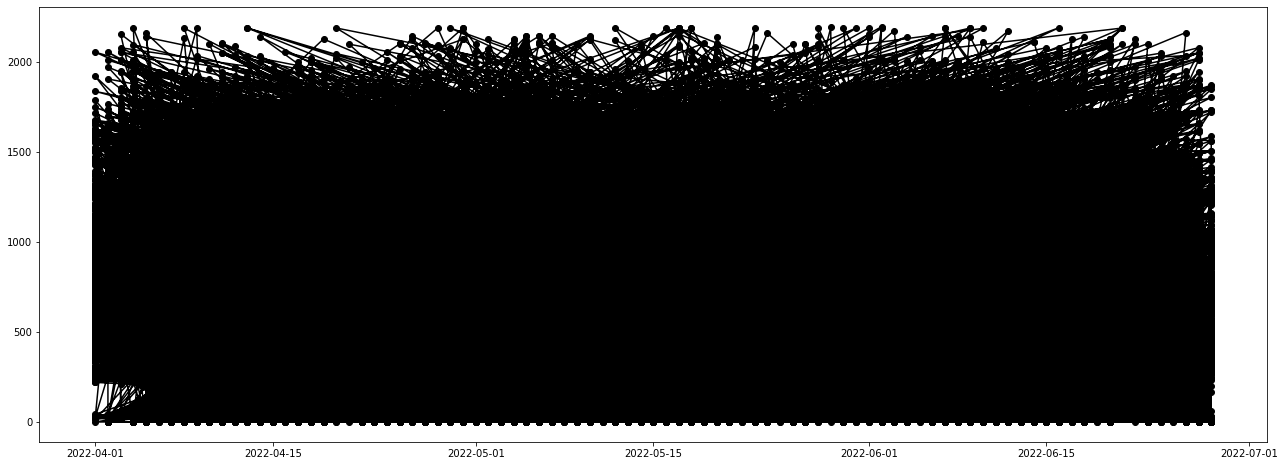

In [ ]:
plt.figure(figsize=(22,8))
plt.plot(df_test["ds"], df_test["y"], 'bo-', color="black")

#plt.plot(prediction[:57], 'bo:', color='blue')
plt.plot(prediction["ds"], prediction["Predicted_Sales"], 'bo:', color='blue')


plt.plot(forecast_P["ds"][:130], forecast_P["yhat"][:130], "bo:", color="red")

plt.legend(['Time Series test ', "Arima",'Prophet'])
plt.title("differences between models")
plt.ylabel("Sales")
plt.xlabel("Date")
plt.show()

In [ ]:
print(len(df_test))
print(len(prediction))

In [ ]:
test = df_test.rename(columns={"y": "Test"})[["Test"]].reset_index(drop=True)
test.columns = ["Test"]
test = test.reset_index(drop=True)
test.shape

In [ ]:
Prophet = prediction[["Predicted_Sales"]][:27]
Prophet.columns = ["Prophet"]
Prophet = Prophet.reset_index(drop=True)

# select the first 27 rows of the test dataframe
test_subset = test[:27]

from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_subset, Prophet)

mean_Prophet = mean_absolute_percentage_error(test_subset, Prophet)
print(f"Percentage of error with the Prophet model: {mean_Prophet*100:.2f}%")


In [ ]:
# check if the DataFrame has a 'Date' column
if dataset.columns.str.contains('Date').any():
    dataset['Date']
else:
    print("DataFrame does not have a 'Date' column")


In [ ]:
# Print the updated DataFrame with datetime 'Date' column
print(dataset)
dataset.info()
dataset.shape

In [ ]:
# Extract the Weekly_Sales column
sales = dataset['Sales']

# Apply the Hodrick-Prescott filter to the data
cycle, trend = hpfilter(sales)

# Plot the original data and the trend component

#Data Exploration
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(sales, label='Original Data', color='blue', linestyle='solid')
ax.plot(trend, label='Trend Component', color='red', linestyle='dashed')
ax.legend()
ax.set_title('Sales with Trend Component')

# Perform the Phillips-Perron test for unit roots on the cyclical component
pp_test = adfuller(cycle)
print('Phillips-Perron test statistics: ', pp_test[0])
print('Phillips-Perron p-value: ', pp_test[1])


In [ ]:
#Holt-Winters' seasonal method (also known as triple exponential smoothing)
#used to capture seasonality and trend in the data.

# apply the Hodrick-Prescott filter to the data
cycle, trend = hpfilter(sales, lamb=1600)

# plot the original data, the trend, and the cyclical component
fig, ax = plt.subplots(figsize=( 12,6))
ax.plot(sales, label='Original Data')
ax.plot(trend, label='Trend Component')
ax.plot(cycle, label='Cyclical Component')
ax.legend()
ax.set_title('Sales with Trend and Cyclical Components')

# calculate the residuals
residuals = sales - trend

# calculate the autocorrelation of the residuals
acf = sm.graphics.tsa.plot_acf(residuals, lags=24)

# perform the Ljung-Box test for autocorrelation
lbvalue, pvalue = sm.stats.acorr_ljungbox(residuals, lags=24)

# print the p-value for the test
print('p-value for Ljung-Box test:', pvalue[-1])


In [ ]:
# timepasss Apply the Hodrick-Prescott filter to the data
hp_filter = hpfilter(sales)
trend, cycle = hp_filter

# Perform the HPFDIAGNOSE test on the cyclical component
results = pd.DataFrame({'cycle':cycle})
results['time'] = range(1,len(cycle)+1)
results.set_index('time', inplace=True)

X = results['cycle'].values
HPD_test = adfuller(X, regression='ct', autolag='AIC')
print('HPFDIAGNOSE test statistics: ', HPD_test[0])
print('HPFDIAGNOSE p-value: ', HPD_test[1])

# Determine the order of differencing (d) and order of AR and MA terms (p, q) for ARIMA model using auto_arima
stepwise_fit = auto_arima(sales, seasonal=False, suppress_warnings=True)
print(stepwise_fit.summary())

# Fit the ARIMA model with the determined parameters
model = ARIMA(sales, order=(1,1,1))
results = model.fit()

# Generate the forecast
forecast = results.forecast(steps=12)

# Plot the original data, trend component, and forecast
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(sales, label='Original Data')
ax.plot(trend, label='Trend Component')
ax.plot(forecast, label='Forecast')
ax.legend()
ax.set_title('Sales with Trend Component and Forecast')
plt.show()


In [ ]:
# Get the start and end dates of the dataset
start_date = dataset.index.min().date()
end_date = dataset.index.max().date()

print('Start date:', start_date)
print('End date:', end_date)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Define the order of the ARIMA model
p = 1  # The number of lag observations included in the model, based on autocorrelation plots
d = 1  # The degree of differencing needed to make the time series stationary, based on unit root tests and visual inspection
q = 1  # The size of the moving average window, based on autocorrelation plots and partial autocorrelation plots

# Fit the ARIMA model to the data
model = ARIMA(dataset['Sales'], order=(p, d, q)).fit()

# Make predictions
predictions = model.predict(start='2022-04-01', end='2022-06-28')

# Plot the actual and predicted values
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(dataset['Sales'], label='Actual')
ax.plot(predictions, label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
ax.legend()
plt.show()

